In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import save_npz, load_npz
from scipy.sparse import csr_matrix
import scipy.sparse as sparse

# Load Datasets

In [5]:
train = load_npz('../datax/Rtrain.npz').tocsr()
active = load_npz('../datax/Ractive.npz').tocsr()
test = load_npz('../datax/Rtest.npz').tocsr()
num_item_per_iter = 1
al_iteration = 50
ratio = [0.5, 0.0, 0.5]
topk = 1
train_index=int(test.shape[0]*ratio[0])
active_threshold=2*num_item_per_iter*al_iteration

In [8]:
def filter_users(matrix_train, matrix_active, matrix_test, train_index, active_threshold):
    active_user_num_nonzero = np.array(matrix_active.sum(axis=1)).ravel()
    active_users = np.where(active_user_num_nonzero >= active_threshold)[0]     
    users = np.concatenate([np.arange(train_index), active_users])
    return matrix_train[users,:], matrix_active[users,:], matrix_test[users,:], users


2

In [ ]:
matrix_train, matrix_active, matrix_test, _ = filter_users(matrix_train,
                                                           matrix_active,
                                                           matrix_test,
                                                           train_index,
                                                           active_threshold=active_threshold,
                                                           test_threshold=2*topk)

# 1. Get Item Popularity

In [2]:
train = load_npz('../datax/Rtrain.npz').tocsr()
train = load_npz('../datax/Rtrain.npz').tocsr()
train = load_npz('../datax/Rtrain.npz').tocsr()

In [3]:
train.nonzero()

(array([3019, 3019, 3019, ..., 6037, 6037, 6037], dtype=int32),
 array([ 336,  502,  559, ..., 3066, 3348, 3388], dtype=int32))

In [4]:
train_item_pop = np.array(train.sum(axis=0))[0]
train_item_pop

array([835., 145.,  80., ...,  17.,  12., 132.], dtype=float32)

In [5]:
train_item_pop

array([835., 145.,  80., ...,  17.,  12., 132.], dtype=float32)

In [6]:
train_item_id_sorted_pop = np.flip(np.argsort(train_item_pop))
train_item_id_sorted_pop

array([2526,  245, 1041, ..., 1322,  779, 2872])

In [7]:
train_item_pop_df = pd.DataFrame(train_item_pop.reshape((3533, 1)), columns=['popularity'])
train_item_pop_df

,popularity
0,835.0
1,145.0
2,80.0
3,16.0
4,49.0
5,311.0
6,99.0
7,9.0
8,14.0
9,252.0


In [8]:
train_item_pop_df.sort_values(by=['popularity'], ascending=False)

,popularity
2526,1419.0
245,1305.0
1041,1275.0
1043,1132.0
1754,1114.0
563,1111.0
2434,1093.0
2260,1093.0
1055,1084.0
502,1044.0


In [9]:
train_item_pop_df.hist(column='popularity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47a7efb4a8>]],
      dtype=object)

In [10]:
train_item_pop_df[train_item_pop_df['popularity'] <= 10]

,popularity
7,9.0
19,10.0
26,7.0
32,0.0
36,3.0
37,5.0
48,5.0
51,2.0
52,4.0
54,0.0


In [11]:
train_item_pop_df.loc[(train_item_pop_df['popularity'] > 10) & (train_item_pop_df['popularity'] < 100)]

,popularity
2,80.0
3,16.0
4,49.0
6,99.0
8,14.0
11,18.0
12,27.0
13,37.0
14,15.0
17,41.0


In [12]:
train_item_pop_df.loc[train_item_pop_df['popularity'] >= 100]

,popularity
0,835.0
1,145.0
5,311.0
9,252.0
10,355.0
15,203.0
16,338.0
20,410.0
23,137.0
24,309.0


# 2. Assign Users to Different Buckets

In [13]:
test = load_npz('../datax/Rtest.npz').tocsr()[:3019]
test

<3019x3533 sparse matrix of type '<class 'numpy.float32'>'
	with 284388 stored elements in Compressed Sparse Row format>

In [14]:
test.nonzero()

(array([   0,    0,    0, ..., 3018, 3018, 3018], dtype=int32),
 array([   0,    9,   16, ..., 3321, 3344, 3399], dtype=int32))

In [15]:
test_user = np.array(test.sum(axis=1))
test_user

array([[ 81.],
       [755.],
       [ 15.],
       ...,
       [117.],
       [ 51.],
       [123.]], dtype=float32)

In [16]:
len(test_user)

3019

In [17]:
test_user_df = pd.DataFrame(test_user, columns=['user_num_postive_ratings_in_train'])
test_user_df

,user_num_postive_ratings_in_train
0,81.0
1,755.0
2,15.0
3,23.0
4,15.0
5,17.0
6,57.0
7,55.0
8,201.0
9,146.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47a5b888d0>]],
      dtype=object)

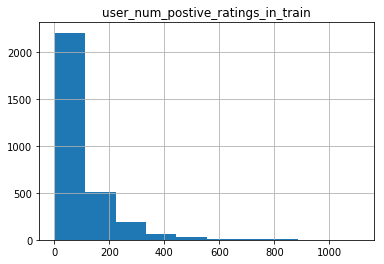

In [18]:
test_user_df.hist(column='user_num_postive_ratings_in_train')

In [19]:
len(test_user_df.loc[test_user_df['user_num_postive_ratings_in_train'] <= 10])

59

In [20]:
len(test_user_df.loc[(test_user_df['user_num_postive_ratings_in_train'] > 10) & 
                 (test_user_df['user_num_postive_ratings_in_train'] <= 20)])

424

In [21]:
len(test_user_df.loc[(test_user_df['user_num_postive_ratings_in_train'] > 20) & 
                 (test_user_df['user_num_postive_ratings_in_train'] <= 30)])

386

In [22]:
len(test_user_df.loc[(test_user_df['user_num_postive_ratings_in_train'] > 30) & 
                 (test_user_df['user_num_postive_ratings_in_train'] <= 40)])

271

In [23]:
len(test_user_df.loc[(test_user_df['user_num_postive_ratings_in_train'] > 10) & 
                 (test_user_df['user_num_postive_ratings_in_train'] <= 100)])

2047

In [24]:
len(test_user_df.loc[test_user_df['user_num_postive_ratings_in_train'] > 100])

913

In [25]:
len(test_user_df.loc[test_user_df['user_num_postive_ratings_in_train'] <= 100])

2106

In [26]:
test_user_df.loc[(test_user_df['user_num_postive_ratings_in_train'] > 10) & 
                 (test_user_df['user_num_postive_ratings_in_train'] < 100)]

,user_num_postive_ratings_in_train
0,81.0
2,15.0
3,23.0
4,15.0
5,17.0
6,57.0
7,55.0
10,80.0
11,15.0
13,15.0


In [27]:
# {"357": prediction[357][0], "52": prediction[52][0], "314": prediction[314][0], "2456": prediction[2456][0], "1804": prediction[1804][0], "331": prediction[331][0]}

In [28]:
test_user_df[test_user_df['user_num_postive_ratings_in_train'] == 10]

,user_num_postive_ratings_in_train
357,10.0
476,10.0
635,10.0
1015,10.0
1226,10.0
1248,10.0
1644,10.0
1819,10.0
2241,10.0
2479,10.0


In [29]:
test_user_df[test_user_df['user_num_postive_ratings_in_train'] == 20]

,user_num_postive_ratings_in_train
52,20.0
147,20.0
148,20.0
171,20.0
259,20.0
342,20.0
414,20.0
486,20.0
568,20.0
579,20.0


In [30]:
test_user_df[test_user_df['user_num_postive_ratings_in_train'] == 50]

,user_num_postive_ratings_in_train
70,50.0
123,50.0
222,50.0
303,50.0
314,50.0
495,50.0
661,50.0
795,50.0
838,50.0
938,50.0


In [31]:
test_user_df[test_user_df['user_num_postive_ratings_in_train'] == 100]

,user_num_postive_ratings_in_train
118,100.0
328,100.0
334,100.0
511,100.0
588,100.0
683,100.0
746,100.0
904,100.0
1010,100.0
1385,100.0


In [32]:
test_user_df[test_user_df['user_num_postive_ratings_in_train'] == test_user_df['user_num_postive_ratings_in_train'].max()]

,user_num_postive_ratings_in_train
1804,1108.0


In [33]:
test_user_df[test_user_df['user_num_postive_ratings_in_train'] == 800]

,user_num_postive_ratings_in_train
331,800.0


# 3. Start User Case Study

In [34]:
column = ["357", "52", "314", "2456", "1804", "331"]

In [35]:
sampling_false_df = pd.read_csv('user_study_sampling_False.csv', sep='\t', encoding='utf-8')
sampling_false_df = sampling_false_df[column]
sampling_false_df.index += 1
sampling_false_df

,357,52,314,2456,1804,331
1,575,1059,2801,2770,970,1333
2,1041,800,2526,1043,1754,2526
3,2094,105,1055,245,1147,563
4,2526,2526,245,1042,1754,2094
5,2526,105,2526,1042,1041,105
6,2526,502,563,1041,2526,2526
7,2526,2526,2526,758,502,1041
8,245,1041,1055,2526,245,502
9,2526,1055,1754,2526,2526,2434
10,2526,2526,2526,2526,2526,245


In [76]:
sampling_true_df = pd.read_csv('user_study_sampling_True.csv', sep='\t', encoding='utf-8')
sampling_true_df = sampling_true_df[column]
sampling_true_df.index += 1
sampling_true_df

,357,52,314,2456,1804,331
1,1102,1041,758,2526,2763,105
2,3085,758,1726,2053,1532,563
3,2094,2526,1113,991,2826,1113
4,245,575,2476,31,105,2526
5,970,299,1041,2659,1754,1754
6,1113,245,245,1370,502,502
7,1113,812,2526,33,336,1754
8,970,1039,2526,2526,105,1043
9,2526,1406,245,2526,336,1754
10,2526,1066,245,2526,1043,1754


# 6. Generate User Case Study Results 

In [74]:
def add_movie_pop_name(id):
    popularity_profile = np.where(train_item_id_sorted_pop == id)[0][0] + 1
    name = ml1m_movie_info_df[ml1m_movie_info_df["MovieID"] == nonzero_index[id]]["Title"].values[0]
    return {popularity_profile: name}

In [78]:
sampling_false_df_final = sampling_false_df.applymap(add_movie_pop_name)
sampling_false_df_final

,357,52,314,2456,1804,331
1,{12: 'Fargo (1996)'},{26: 'Alien (1979)'},"{87: 'Green Mile, The (1999)'}",{46: 'Toy Story 2 (1999)'},{22: 'E.T. the Extra-Terrestrial (1982)'},"{131: 'Fifth Element, The (1997)'}"
2,{3: 'Star Wars: Episode V - The Empire Strikes...,{36: 'Casablanca (1942)'},{1: 'American Beauty (1999)'},{4: 'Raiders of the Lost Ark (1981)'},{5: 'Saving Private Ryan (1998)'},{1: 'American Beauty (1999)'}
3,{19: 'Shakespeare in Love (1998)'},{15: 'Braveheart (1995)'},{9: 'Star Wars: Episode VI - Return of the Jed...,{2: 'Star Wars: Episode IV - A New Hope (1977)'},{62: 'Butch Cassidy and the Sundance Kid (1969)'},"{6: 'Silence of the Lambs, The (1991)'}"
4,{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},{2: 'Star Wars: Episode IV - A New Hope (1977)'},"{18: 'Princess Bride, The (1987)'}",{5: 'Saving Private Ryan (1998)'},{19: 'Shakespeare in Love (1998)'}
5,{1: 'American Beauty (1999)'},{15: 'Braveheart (1995)'},{1: 'American Beauty (1999)'},"{18: 'Princess Bride, The (1987)'}",{3: 'Star Wars: Episode V - The Empire Strikes...,{15: 'Braveheart (1995)'}
6,{1: 'American Beauty (1999)'},{10: 'Schindler's List (1993)'},"{6: 'Silence of the Lambs, The (1991)'}",{3: 'Star Wars: Episode V - The Empire Strikes...,{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'}
7,{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},"{14: 'Godfather, The (1972)'}",{10: 'Schindler's List (1993)'},{3: 'Star Wars: Episode V - The Empire Strikes...
8,{2: 'Star Wars: Episode IV - A New Hope (1977)'},{3: 'Star Wars: Episode V - The Empire Strikes...,{9: 'Star Wars: Episode VI - Return of the Jed...,{1: 'American Beauty (1999)'},{2: 'Star Wars: Episode IV - A New Hope (1977)'},{10: 'Schindler's List (1993)'}
9,{1: 'American Beauty (1999)'},{9: 'Star Wars: Episode VI - Return of the Jed...,{5: 'Saving Private Ryan (1998)'},{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},"{7: 'Sixth Sense, The (1999)'}"
10,{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},{2: 'Star Wars: Episode IV - A New Hope (1977)'}


In [80]:
sampling_false_df_final.to_csv("user_case_study_using_mean.csv", sep='\t', encoding='utf-8', index=False)

In [79]:
sampling_true_df_final = sampling_true_df.applymap(add_movie_pop_name)
sampling_true_df_final

,357,52,314,2456,1804,331
1,{41: 'Stand by Me (1986)'},{3: 'Star Wars: Episode V - The Empire Strikes...,"{14: 'Godfather, The (1972)'}",{1: 'American Beauty (1999)'},{394: 'Backdraft (1991)'},{15: 'Braveheart (1995)'}
2,{66: 'Close Encounters of the Third Kind (1977)'},"{14: 'Godfather, The (1972)'}",{59: 'Lethal Weapon (1987)'},"{56: 'Bug's Life, A (1998)'}",{73: 'As Good As It Gets (1997)'},"{6: 'Silence of the Lambs, The (1991)'}"
3,{19: 'Shakespeare in Love (1998)'},{1: 'American Beauty (1999)'},{16: 'Back to the Future (1985)'},"{82: 'Abyss, The (1989)'}",{60: 'Galaxy Quest (1999)'},{16: 'Back to the Future (1985)'}
4,{2: 'Star Wars: Episode IV - A New Hope (1977)'},{12: 'Fargo (1996)'},"{70: 'Christmas Story, A (1983)'}",{63: 'Twelve Monkeys (1995)'},{15: 'Braveheart (1995)'},{1: 'American Beauty (1999)'}
5,{22: 'E.T. the Extra-Terrestrial (1982)'},"{13: 'Shawshank Redemption, The (1994)'}",{3: 'Star Wars: Episode V - The Empire Strikes...,{21: 'Being John Malkovich (1999)'},{5: 'Saving Private Ryan (1998)'},{5: 'Saving Private Ryan (1998)'}
6,{16: 'Back to the Future (1985)'},{2: 'Star Wars: Episode IV - A New Hope (1977)'},{2: 'Star Wars: Episode IV - A New Hope (1977)'},{29: 'Men in Black (1997)'},{10: 'Schindler's List (1993)'},{10: 'Schindler's List (1993)'}
7,{16: 'Back to the Future (1985)'},{47: '2001: A Space Odyssey (1968)'},{1: 'American Beauty (1999)'},{52: 'Babe (1995)'},{27: 'Forrest Gump (1994)'},{5: 'Saving Private Ryan (1998)'}
8,{22: 'E.T. the Extra-Terrestrial (1982)'},{33: 'One Flew Over the Cuckoo's Nest (1975)'},{1: 'American Beauty (1999)'},{1: 'American Beauty (1999)'},{15: 'Braveheart (1995)'},{4: 'Raiders of the Lost Ark (1981)'}
9,{1: 'American Beauty (1999)'},{17: 'L.A. Confidential (1997)'},{2: 'Star Wars: Episode IV - A New Hope (1977)'},{1: 'American Beauty (1999)'},{27: 'Forrest Gump (1994)'},{5: 'Saving Private Ryan (1998)'}
10,{1: 'American Beauty (1999)'},"{37: 'Godfather: Part II, The (1974)'}",{2: 'Star Wars: Episode IV - A New Hope (1977)'},{1: 'American Beauty (1999)'},{4: 'Raiders of the Lost Ark (1981)'},{5: 'Saving Private Ryan (1998)'}


In [81]:
sampling_true_df_final.to_csv("user_case_study_using_sampling.csv", sep='\t', encoding='utf-8', index=False)

# 4. Import ML-1M Movie Info

In [36]:
ml1m_movie_info_df = pd.read_csv('../datax/ml-1m/movies.dat', header=None, 
            names=['MovieID', 'Title', 'Genres'],
            sep='::', engine='python')
# MovieID::Title::Genres
ml1m_movie_info_df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [37]:
ml1m_movie_title = ml1m_movie_info_df.as_matrix(columns=['Title']).flatten()
ml1m_movie_title

/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Tigerland (2000)', 'Two Family House (2000)',
       'Contender, The (2000)'], dtype=object)

In [54]:
ml1m_movie_info_df[ml1m_movie_info_df["MovieID"] == 2858]["Title"].values[0]

'American Beauty (1999)'

In [55]:
ml1m_movie_info_df[ml1m_movie_info_df["MovieID"] == 260]["Title"].values[0]

'Star Wars: Episode IV - A New Hope (1977)'

# 5. Import ML-1M Movie Rating Info

In [40]:
ml1m_movie_rating_df = pd.read_csv('../datax/ml-1m/ratings.csv', sep=',')
ml1m_movie_rating_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [41]:
rows = ml1m_movie_rating_df['userId']
cols = ml1m_movie_rating_df['movieId']
values = ml1m_movie_rating_df['rating']
rating_matrix = csr_matrix((values, (rows, cols)), shape=(138494, 131263))
rating_matrix

<138494x131263 sparse matrix of type '<class 'numpy.int64'>'
	with 1000209 stored elements in Compressed Sparse Row format>

In [42]:
rating_matrix.nonzero()

(array([   1,    1,    1, ..., 6040, 6040, 6040], dtype=int32),
 array([   1,   48,  150, ..., 3735, 3751, 3819], dtype=int32))

In [43]:
temp_rating_matrix = sparse.csr_matrix(rating_matrix.shape)
temp_rating_matrix

<138494x131263 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [44]:
temp_rating_matrix[(rating_matrix > 3).nonzero()] = 1

/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  """Entry point for launching an IPython kernel.


In [45]:
rating_matrix = temp_rating_matrix.tocsr()

In [46]:
nonzero_index = np.unique(rating_matrix.nonzero()[1])

In [47]:
nonzero_index

array([   1,    2,    3, ..., 3950, 3951, 3952], dtype=int32)

In [48]:
len(nonzero_index)

3533

In [49]:
nonzero_index[2526]

2858

In [50]:
nonzero_index[245]

260

In [100]:
# rating_matrix = rating_matrix[:, nonzero_index]
# rating_matrix

<138494x3533 sparse matrix of type '<class 'numpy.float64'>'
	with 575281 stored elements in Compressed Sparse Row format>